<a href="https://colab.research.google.com/github/Natalia-SB/portfolio/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise de dados (Em andamento)

### 1. Definição do problema



> O objetivo é identificar os principais fatores que levam os clientes a cancelarem seus serviços ou deixarem de fazer negócios com uma empresa


1. 1   Dataset

>https://www.kaggle.com/datasets/blastchar/telco-customer-churn








### 2. Importação de biblioteca e dados

In [ ]:
#importação das bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
#importação dos dados

churn = pd.read_csv("churn.csv")

### 3. Exploração de dados

O dataset possui 21 colunas, mas para esta análise será focado apenas nas colunas de tenure onde apresenta o tempo em que o cliente permaneceu na empresa com a coluna do churn para saber se o cliente ainda está ativo na empresa

In [ ]:
#exibindo as primeiras linhas do dataset
print(churn.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
#informações gerais do conjutos de dados

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#verificando as dimensões do dataset
print(churn.shape)

(7043, 21)


In [ ]:
#visão geral dos dados

display(churn)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#verificando valores faltantes
print(churn.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### 4. Limpeza de dados

> Para limpeza dos dados serão removidas duplicatas e valores ausentes


In [ ]:
#remover duplicatas
churn = churn.drop_duplicates()

#remover linhas com valores ausentes
churn = churn.dropna()

#tratando valores faltantes
churn = churn.fillna(churn.mean())

<ipython-input-6-37b804d9b178>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn = churn.fillna(churn.mean())



### 5. Exploração dos dados



> A exploração dos dados trará *insights* e entendimento dos dados



In [ ]:
churn[["customerID", "tenure", "Churn"]]

,customerID,tenure,Churn
0,7590-VHVEG,1,No
1,5575-GNVDE,34,No
2,3668-QPYBK,2,Yes
3,7795-CFOCW,45,No
4,9237-HQITU,2,Yes
...,...,...,...
7038,6840-RESVB,24,No
7039,2234-XADUH,72,No
7040,4801-JZAZL,11,No
7041,8361-LTMKD,4,Yes


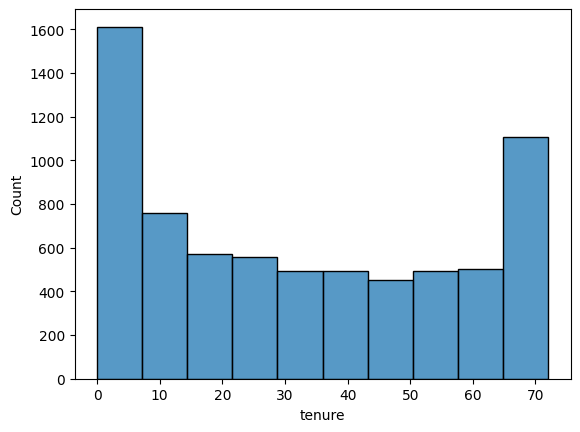

In [ ]:
#distribuição das variáveis numéricas
sns.histplot(churn['tenure'], kde=False, bins=10)
plt.show()

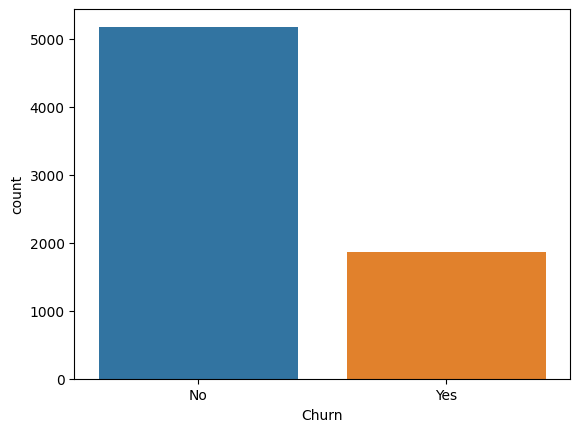

In [ ]:
#distribuição das variáveis categóricas
sns.countplot(x='Churn', data=churn)
plt.show()

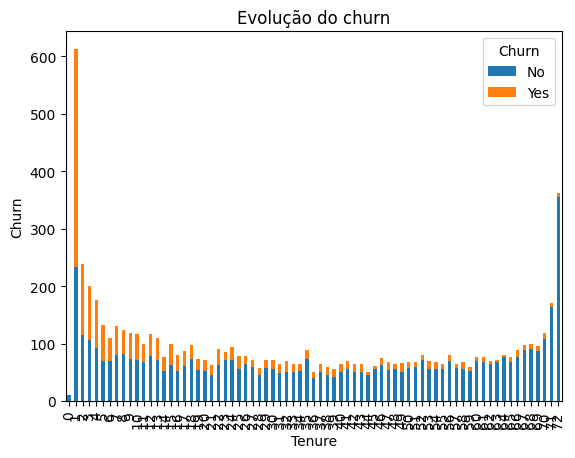

In [ ]:
churn_grouped = churn.groupby('tenure')['Churn'].value_counts().unstack()

churn_grouped.plot.bar(stacked=True)
plt.title('Evolução do churn')
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.show()

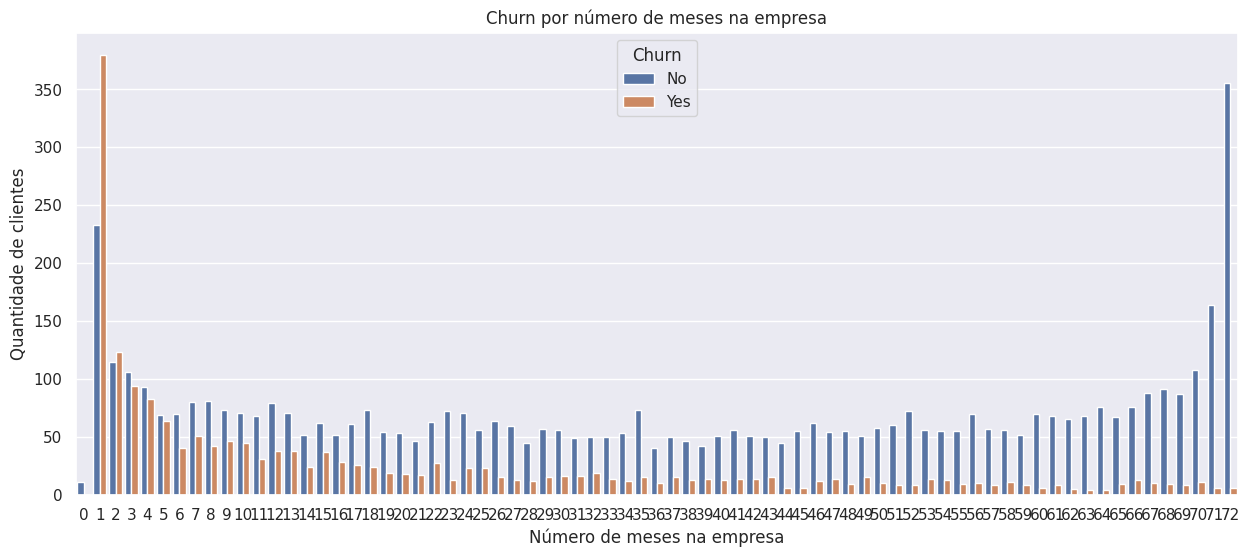

In [ ]:
#cria o gráfico de barras
sns.countplot(x='tenure', hue='Churn', data=churn)

#configura o título e os eixos
plt.title('Churn por número de meses na empresa')
plt.xlabel('Número de meses na empresa')
plt.ylabel('Quantidade de clientes')

#define o tamanho da figura
sns.set(rc={'figure.figsize':(15,6)})

#mostra o gráfico
plt.show()

<ipython-input-13-030906383e61>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churn.corr(), annot=True)


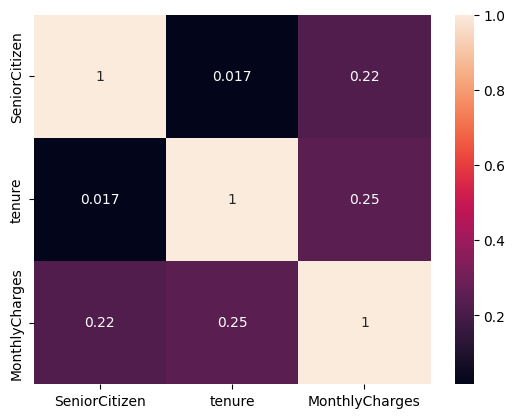

In [ ]:
#Correlação entre as variáveis
sns.heatmap(churn.corr(), annot=True)
plt.show()

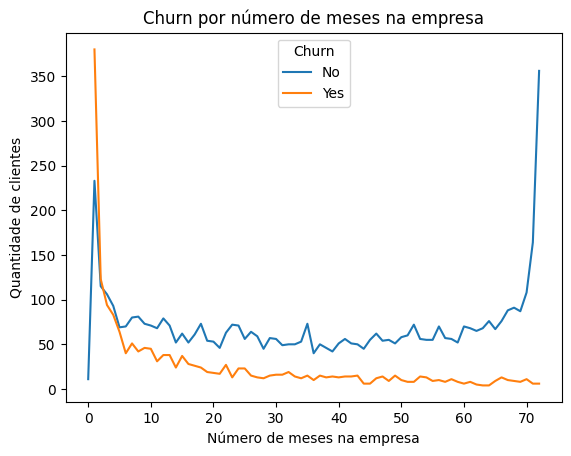

In [ ]:
#cria o gráfico de linhas
churn_agg = churn.groupby(['tenure', 'Churn']).size().reset_index(name='count')
sns.lineplot(x='tenure', y='count', hue='Churn', data=churn_agg)

#configura o título e os eixos
plt.title('Churn por número de meses na empresa')
plt.xlabel('Número de meses na empresa')
plt.ylabel('Quantidade de clientes')

#mostra o gráfico
plt.show()

In [ ]:
#tipos de dados PaymentMethod
print(churn['PaymentMethod'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


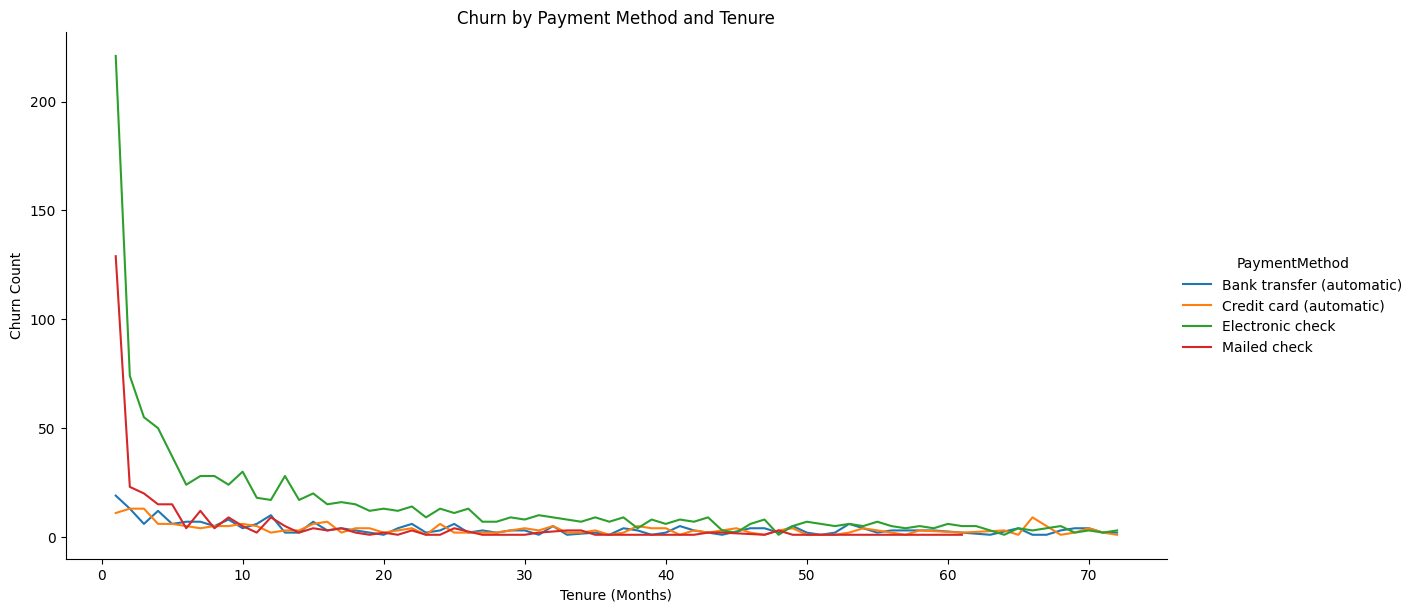

In [ ]:
#filtra apenas os dados de churn "yes"
churn_yes = churn[churn['Churn'] == 'Yes']

#agrupa os dados por PaymentMethod e tenure, e calcula a contagem de ocorrências
churn_by_paymentmethod = churn_yes.groupby(['PaymentMethod', 'tenure'])['Churn'].count().reset_index()

#cria o gráfico de linhas usando a função sns.relplot()
sns.relplot(x='tenure', y='Churn', hue='PaymentMethod', kind='line', data=churn_by_paymentmethod, height=6, aspect=2)

#configura o título e os eixos
plt.title('Churn by Payment Method and Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Count')

#exibe o gráfico
plt.show()

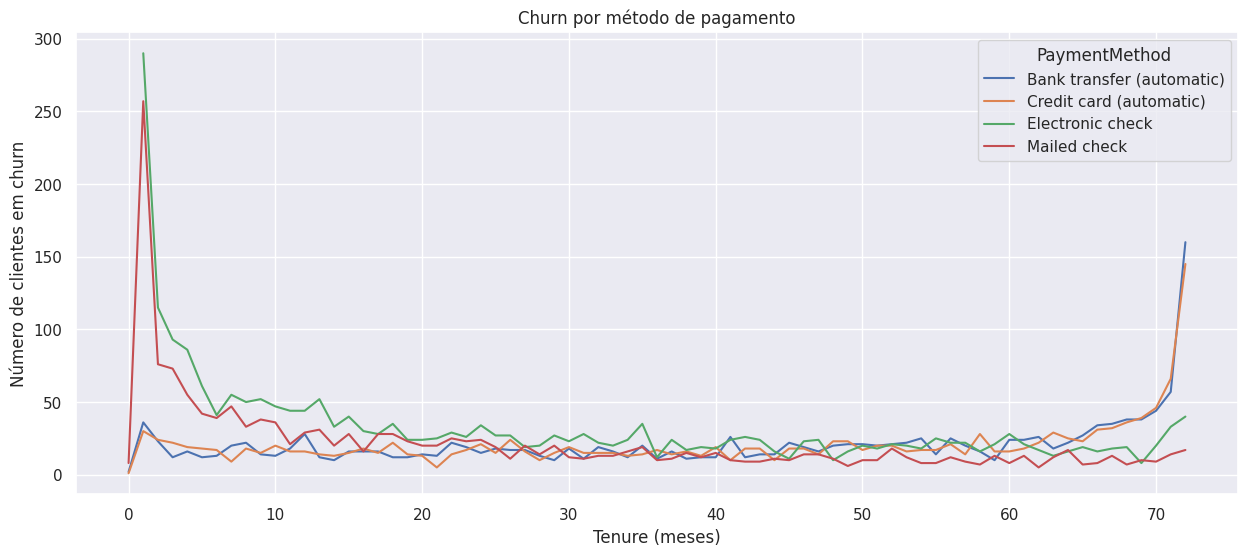

In [ ]:
#agrupa os dados por PaymentMethod e tenure, contando a quantidade de churns em cada grupo
churn_by_paymentmethod = churn.groupby(['PaymentMethod', 'tenure'])['Churn'].count().reset_index()

#filtra os dados para manter apenas os clientes em estado de churn
churn_by_paymentmethod = churn_by_paymentmethod[churn_by_paymentmethod['Churn'] > 0]

#cria o gráfico de linhas usando a função sns.lineplot()
sns.lineplot(x='tenure', y='Churn', hue='PaymentMethod', data=churn_by_paymentmethod, markers=True)

#configura o título e os eixos
plt.title('Churn por método de pagamento')
plt.xlabel('Tenure (meses)')
plt.ylabel('Número de clientes em churn')
plt.show()

###6. Modelagem

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score